In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [6]:
data={
    'CommitID': range(1,101),
    'LinesOfCode': [100+i*10 for i in range(100)],
    'CodeComplexity': [5+i%5 for i in range(100)],
    'BugsReported': [1 if i%10 == 0 else 0 for i in range(100)],
    'RaviewComments': [3+i%3 for i in range(100)]
}

In [7]:
df= pd.DataFrame(data)

In [8]:
print("TRUEFY TECHNOLOGIES PRIVATE LIMITED - Software Quality Data")
print(df.head())

TRUEFY TECHNOLOGIES PRIVATE LIMITED - Software Quality Data
   CommitID  LinesOfCode  CodeComplexity  BugsReported  RaviewComments
0         1          100               5             1               3
1         2          110               6             0               4
2         3          120               7             0               5
3         4          130               8             0               3
4         5          140               9             0               4


In [11]:
df.fillna(df.mean(), inplace=True)

In [12]:
print("Summary Statics:")
print(df.describe())

Summary Statics:
         CommitID  LinesOfCode  CodeComplexity  BugsReported  RaviewComments
count  100.000000    100.00000      100.000000    100.000000      100.000000
mean    50.500000    595.00000        7.000000      0.100000        3.990000
std     29.011492    290.11492        1.421338      0.301511        0.822598
min      1.000000    100.00000        5.000000      0.000000        3.000000
25%     25.750000    347.50000        6.000000      0.000000        3.000000
50%     50.500000    595.00000        7.000000      0.000000        4.000000
75%     75.250000    842.50000        8.000000      0.000000        5.000000
max    100.000000   1090.00000        9.000000      1.000000        5.000000


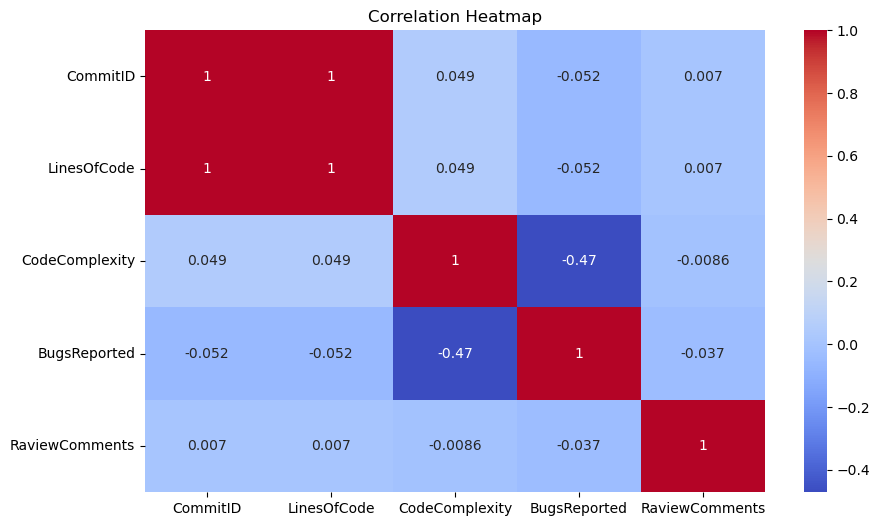

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
X=df[['LinesOfCode','CodeComplexity', 'RaviewComments']]
y=df['BugsReported']



In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [16]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
y_pred = model.predict(X_test)

In [18]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassifiation Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[23  0]
 [ 7  0]]

Classifiation Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        23
           1       0.00      0.00      0.00         7

    accuracy                           0.77        30
   macro avg       0.38      0.50      0.43        30
weighted avg       0.59      0.77      0.67        30



C:\Users\TECQNIO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TECQNIO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TECQNIO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


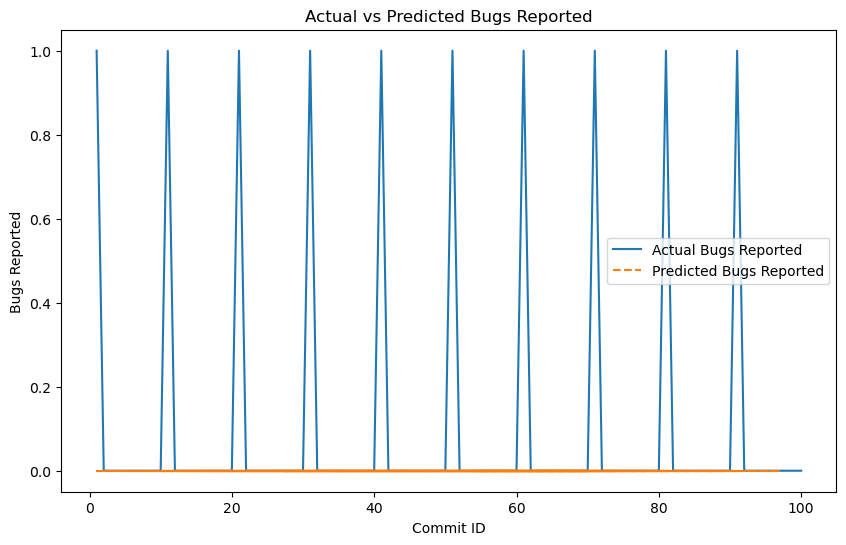

In [19]:
plt.figure(figsize=(10,6))
plt.plot(df['CommitID'], df['BugsReported'], label= 'Actual Bugs Reported')
plt.plot(df['CommitID'][y_test.index], y_pred, label='Predicted Bugs Reported', linestyle='--')
plt.xlabel('Commit ID')
plt.ylabel('Bugs Reported')
plt.title('Actual vs Predicted Bugs Reported')
plt.legend()
plt.show()